# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
df = pd.read_csv("maternal_health.csv")

In [2]:
df.shape

(1014, 7)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
#identifying how many unique values each column has
data= df.astype('object').describe(include='all').loc['unique'].reset_index()
values = data.sort_values(by='unique', ascending=False,).reset_index()
values

,level_0,index,unique
0,0,Age,50
1,3,BS,29
2,1,SystolicBP,19
3,2,DiastolicBP,16
4,5,HeartRate,16
5,4,BodyTemp,8
6,6,RiskLevel,3


In [4]:
# column with greatest unique values
data.loc[0,'index']

'Age'

In [5]:
#column with next most number of unique values
data.loc[1,'index']

'SystolicBP'

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [6]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
#Identifying column 'risklevel' only with value 'highrisk'
cond = df['RiskLevel']=='high risk'
df_ = df[cond]
df_

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
5,23,140,80,7.01,98.0,70,high risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.00,98.0,88,high risk
1009,22,120,60,15.00,98.0,80,high risk
1010,55,120,90,18.00,98.0,60,high risk
1011,35,85,60,19.00,98.0,86,high risk


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [8]:
from matplotlib import pyplot as plt


(array([279., 307., 176., 114.,  96.,  41.,   1.,   0.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 8 Patch objects>)

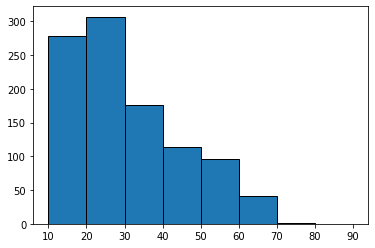

In [9]:
bins= 10,20,30,40,50,60,70,80,90
plt.hist(df['Age'], bins=bins, edgecolor='black')

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [10]:
def group_age(Age):
    if 10<=Age<=15:
        return '10-15'
    if 16<=Age<=20:
        return '15-20'
    if 21<=Age<=25:
        return '20-25'
    if 26<=Age<=30:
        return '26-30'
    if 31<=Age<=35:
        return '31-35'
    if 36<=Age<=40:
        return '36-40'
    if 41<=Age<=60:
        return '41-60'
    else:
        return '>60'

df['group_age'] = df['Age'].apply(group_age)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,group_age
0,25,130,80,15.0,98.0,86,high risk,20-25
1,35,140,90,13.0,98.0,70,high risk,31-35
2,29,90,70,8.0,100.0,80,high risk,26-30
3,30,140,85,7.0,98.0,70,high risk,26-30
4,35,120,60,6.1,98.0,76,low risk,31-35
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,20-25
1010,55,120,90,18.0,98.0,60,high risk,41-60
1011,35,85,60,19.0,98.0,86,high risk,31-35
1012,43,120,90,18.0,98.0,70,high risk,41-60


In [11]:
cond_1 = df['RiskLevel'] == "high risk"
Age_grp= df[cond_1].groupby(by='group_age')
result = Age_grp['RiskLevel'].value_counts()
result_=result.sort_values(ascending=False)
result_

group_age  RiskLevel
41-60      high risk    83
36-40      high risk    46
31-35      high risk    45
20-25      high risk    31
15-20      high risk    26
26-30      high risk    25
10-15      high risk    13
>60        high risk     3
Name: RiskLevel, dtype: int64



---



## Submitting Your Work

Submit your work as usual.